In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_squared_error

In [3]:
# Load CSVs
recipes = pd.read_csv("recipes.csv")
reviews = pd.read_csv("reviews.csv")

print(recipes.shape, reviews.shape)
recipes.head()


(522517, 28) (1401982, 8)


,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."


In [13]:
print(recipes.shape, reviews.shape)
reviews.head()

(522517, 28) (1401982, 8)


,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified
0,2,992,2008,gayg msft,5,better than any you can get at a restaurant!,2000-01-25T21:44:00Z,2000-01-25T21:44:00Z
1,7,4384,1634,Bill Hilbrich,4,"I cut back on the mayo, and made up the differ...",2001-10-17T16:49:59Z,2001-10-17T16:49:59Z
2,9,4523,2046,Gay Gilmore ckpt,2,i think i did something wrong because i could ...,2000-02-25T09:00:00Z,2000-02-25T09:00:00Z
3,13,7435,1773,Malarkey Test,5,easily the best i have ever had. juicy flavor...,2000-03-13T21:15:00Z,2000-03-13T21:15:00Z
4,14,44,2085,Tony Small,5,An excellent dish.,2000-03-28T12:51:00Z,2000-03-28T12:51:00Z


In [ ]:
# Drop duplicate recipes/reviews
recipes = recipes.drop_duplicates(subset="RecipeId")
reviews = reviews.drop_duplicates(subset="ReviewId")

nutritional_cols = [
    "Calories","FatContent","SaturatedFatContent","CholesterolContent",
    "SodiumContent","CarbohydrateContent","FiberContent","SugarContent","ProteinContent"
]
for col in nutritional_cols:
    recipes[col] = pd.to_numeric(recipes[col], errors="coerce")


In [5]:
n_users = reviews["AuthorId"].nunique()
n_items = reviews["RecipeId"].nunique()

# Total ratings
n_ratings = len(reviews)

# Average ratings
avg_ratings_per_user = n_ratings / n_users
avg_ratings_per_item = n_ratings / n_items
avg_rating = reviews["Rating"].mean()
rating_sd = reviews["Rating"].std()

ratings_per_user = reviews.groupby("AuthorId").size()
ratings_per_item = reviews.groupby("RecipeId").size()

max_ratings_by_user = ratings_per_user.max()
max_ratings_by_item = ratings_per_item.max()

# Density of ratings
density = n_ratings / (n_users * n_items)

print(density)

# Put it all into a summary table
summary = pd.DataFrame({
    "Number of users": [n_users],
    "Number of items": [n_items],
    "Total ratings": [n_ratings],
    "Avg ratings per user": [avg_ratings_per_user],
    "Avg ratings per item": [avg_ratings_per_item],
    "Avg rating": [avg_rating],
    "Rating SD": [rating_sd],
    "Max ratings by user": [max_ratings_by_user],
    "Max ratings by item": [max_ratings_by_item],
    "Density": [density]
})

display(summary.round(3))

1.897874882176401e-05


,Number of users,Number of items,Total ratings,Avg ratings per user,Avg ratings per item,Avg rating,Rating SD,Max ratings by user,Max ratings by item,Density
0,271907,271678,1401982,5.156,5.16,4.408,1.272,8842,2892,0.0


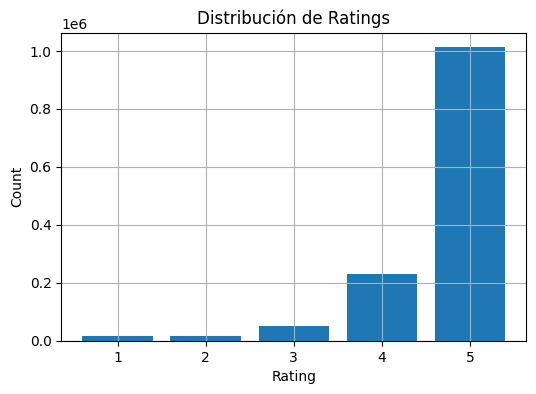

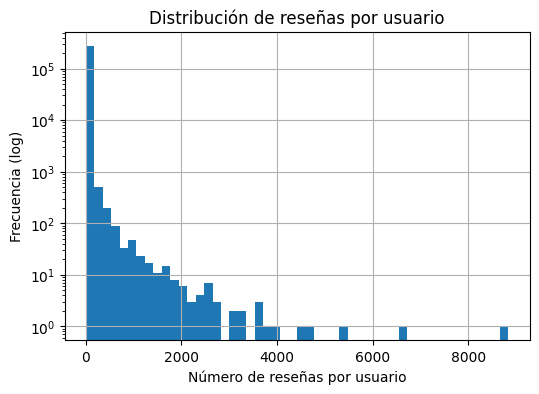

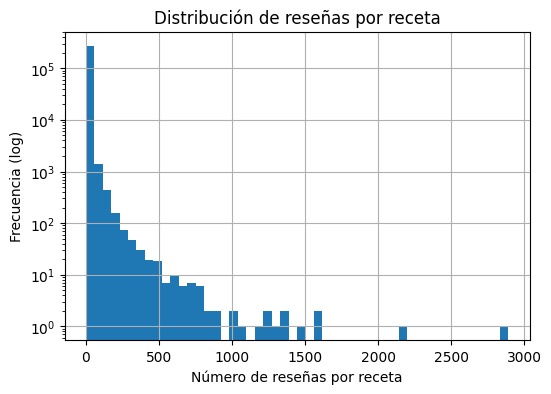

RMSE Random: 2.3713833265658306
RMSE Item mean: 1.3405117398462771
RMSE User mean: 1.267146619101363


In [14]:
plt.figure(figsize=(6,4))
reviews["Rating"].hist(bins=np.arange(0.5, 6, 1), rwidth=0.8)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribución de Ratings")
plt.show()

# Numero de reseñas por usuario
user_counts = reviews.groupby("AuthorId").size()
plt.figure(figsize=(6,4))
user_counts.hist(bins=50, log=True)
plt.xlabel("Número de reseñas por usuario")
plt.ylabel("Frecuencia (log)")
plt.title("Distribución de reseñas por usuario")
plt.show()

item_counts = reviews.groupby("RecipeId").size()
plt.figure(figsize=(6,4))
item_counts.hist(bins=50, log=True)
plt.xlabel("Número de reseñas por receta")
plt.ylabel("Frecuencia (log)")
plt.title("Distribución de reseñas por receta")
plt.show()

# Split train/test
train, test = train_test_split(reviews, test_size=0.2)

# Random predictions
test["pred_random"] = np.random.randint(1, 6, size=len(test))

# Most Popular (item mean)
item_means = train.groupby("RecipeId")["Rating"].mean()
test["pred_item_mean"] = test["RecipeId"].map(item_means).fillna(train["Rating"].mean())

# User Mean
user_means = train.groupby("AuthorId")["Rating"].mean()
test["pred_user_mean"] = test["AuthorId"].map(user_means).fillna(train["Rating"].mean())

rmse_random = root_mean_squared_error(test["Rating"], test["pred_random"])
rmse_item = root_mean_squared_error(test["Rating"], test["pred_item_mean"])
rmse_user = root_mean_squared_error(test["Rating"], test["pred_user_mean"])

print("RMSE Random:", rmse_random)
print("RMSE Item mean:", rmse_item)
print("RMSE User mean:", rmse_user)
